In [13]:
# Data handling and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm

# XGBoost for gradient boosting
import xgboost as xgb

In [14]:
data = pd.read_csv(r"traffic volume.csv")
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

# Load your dataset
data = pd.read_csv("traffic volume.csv")

# Handle missing values in 'holiday'
data['holiday'].fillna("None", inplace=True)

# 🔄 Split 'date' into day, month, year
data[['day', 'month', 'year']] = data['date'].str.split("-", expand=True)

# 🔄 Split 'Time' into hours, minutes, seconds
data[['hours', 'minutes', 'seconds']] = data['Time'].str.split(":", expand=True)

# 🗑 Drop original 'date' and 'Time' columns
data.drop(columns=['date', 'Time'], inplace=True)

# 🔁 Convert everything to correct numeric type
data[['day', 'month', 'year', 'hours', 'minutes', 'seconds']] = data[['day', 'month', 'year', 'hours', 'minutes', 'seconds']].astype(int)

# Encode 'holiday' and 'weather'
le = LabelEncoder()
data['holiday'] = le.fit_transform(data['holiday'])
data['weather'] = le.fit_transform(data['weather'])

# Split x and y
y = data['traffic_volume']
x = data.drop(columns=['traffic_volume'])

# ⚖ Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# ✅ Save the scaler
pickle.dump(scaler, open("scale.pkl", "wb"))
print("✅ scale.pkl saved successfully")

C:\Users\manuv\AppData\Local\Temp\ipykernel_12448\1455634905.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['holiday'].fillna("None", inplace=True)


✅ scale.pkl saved successfully


In [16]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,7,288.28,0.0,0.0,1,5545,2,10,2012,9,0,0
1,7,289.36,0.0,0.0,1,4516,2,10,2012,10,0,0
2,7,289.58,0.0,0.0,1,4767,2,10,2012,11,0,0
3,7,290.13,0.0,0.0,1,5026,2,10,2012,12,0,0
4,7,291.14,0.0,0.0,1,4918,2,10,2012,13,0,0


In [19]:
data.describe()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
count,48204.000000,48151.000000,48202.000000,48192.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.0,48204.0
mean,6.997780,281.205351,0.334278,0.000222,2.586860,3259.818355,15.737636,6.506037,2015.512426,11.398162,0.0,0.0
std,0.139999,13.343675,44.790062,0.008169,2.795944,1986.860670,8.722938,3.400221,1.893211,6.940238,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2012.000000,0.000000,0.0,0.0
25%,7.000000,272.160000,0.000000,0.000000,0.000000,1193.000000,8.000000,4.000000,2014.000000,5.000000,0.0,0.0
50%,7.000000,282.460000,0.000000,0.000000,1.000000,3380.000000,16.000000,7.000000,2016.000000,11.000000,0.0,0.0
75%,7.000000,291.810000,0.000000,0.000000,5.000000,4933.000000,23.000000,9.000000,2017.000000,17.000000,0.0,0.0
max,11.000000,310.070000,9831.300000,0.510000,11.000000,7280.000000,31.000000,12.000000,2018.000000,23.000000,0.0,0.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  int32  
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48204 non-null  int32  
 5   traffic_volume  48204 non-null  int64  
 6   day             48204 non-null  int32  
 7   month           48204 non-null  int32  
 8   year            48204 non-null  int32  
 9   hours           48204 non-null  int32  
 10  minutes         48204 non-null  int32  
 11  seconds         48204 non-null  int32  
dtypes: float64(3), int32(8), int64(1)
memory usage: 2.9 MB


In [21]:
data.isnull().sum()

holiday            0
temp              53
rain               2
snow              12
weather            0
traffic_volume     0
day                0
month              0
year               0
hours              0
minutes            0
seconds            0
dtype: int64

In [22]:
print(data.columns)

Index(['holiday', 'temp', 'rain', 'snow', 'weather', 'traffic_volume', 'day',
       'month', 'year', 'hours', 'minutes', 'seconds'],
      dtype='object')


In [23]:
from collections import Counter

# Fill missing numeric columns with mean
data['temp'].fillna(data['temp'].mean(), inplace=True)
data['rain'].fillna(data['rain'].mean(), inplace=True)
data['snow'].fillna(data['snow'].mean(), inplace=True)

# Print frequency of weather categories before filling
print("Weather value counts before filling:")
print(Counter(data['weather']))

# Fill missing 'weather' values with most common value: 'Clouds'
data['weather'].fillna("Clouds", inplace=True)

data['holiday'].fillna("None", inplace=True)

# Confirm that all missing values are handled
print("\nMissing values after cleaning:")
print(data.isnull().sum())

Weather value counts before filling:
Counter({1: 15144, 0: 13383, 5: 5942, 6: 5665, 8: 2875, 2: 1818, 4: 1359, 10: 1033, 3: 912, 11: 49, 7: 20, 9: 4})

Missing values after cleaning:
holiday           0
temp              0
rain              0
snow              0
weather           0
traffic_volume    0
day               0
month             0
year              0
hours             0
minutes           0
seconds           0
dtype: int64


C:\Users\manuv\AppData\Local\Temp\ipykernel_12448\3271306077.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['temp'].fillna(data['temp'].mean(), inplace=True)
C:\Users\manuv\AppData\Local\Temp\ipykernel_12448\3271306077.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [24]:
# Step 1: Fill missing values in 'holiday'
data['holiday'].fillna("None", inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Very important: fit the encoder on the column after filling missing values
data['holiday'] = data['holiday'].astype(str)  # ensure string
data['holiday'] = le.fit_transform(data['holiday'])

C:\Users\manuv\AppData\Local\Temp\ipykernel_12448\1847196212.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['holiday'].fillna("None", inplace=True)


In [25]:
import pickle 
pickle.dump(le, open("encoder.pkl",'wb'))

In [26]:
# Encode 'weather' column
data['weather'].fillna("Unknown", inplace=True)  # Handle missing values first
data['weather'] = le.fit_transform(data['weather'])

C:\Users\manuv\AppData\Local\Temp\ipykernel_12448\4175651497.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['weather'].fillna("Unknown", inplace=True)  # Handle missing values first


In [27]:
print(data.columns)

Index(['holiday', 'temp', 'rain', 'snow', 'weather', 'traffic_volume', 'day',
       'month', 'year', 'hours', 'minutes', 'seconds'],
      dtype='object')


In [28]:
# Make sure all columns are numeric (except 'traffic_volume')
for col in data.columns:
    if col != 'traffic_volume':
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Check if any columns still have nulls due to coercion
print(data.isnull().sum())

# Fill any nulls that might have appeared
data.fillna(0, inplace=True)

holiday           0
temp              0
rain              0
snow              0
weather           0
traffic_volume    0
day               0
month             0
year              0
hours             0
minutes           0
seconds           0
dtype: int64


<Axes: >

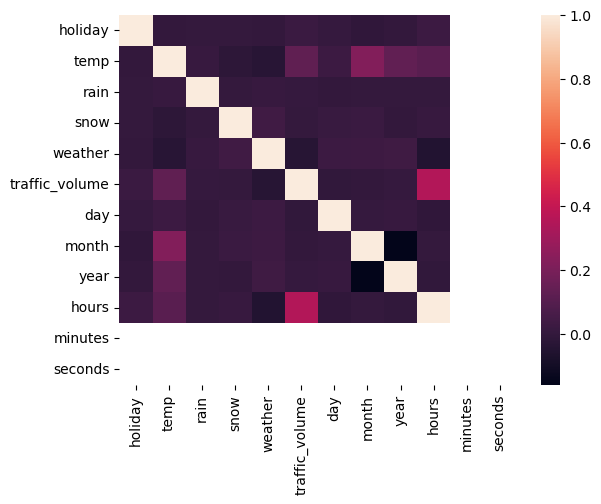

In [80]:
cor=data.corr()
sns.heatmap(cor)

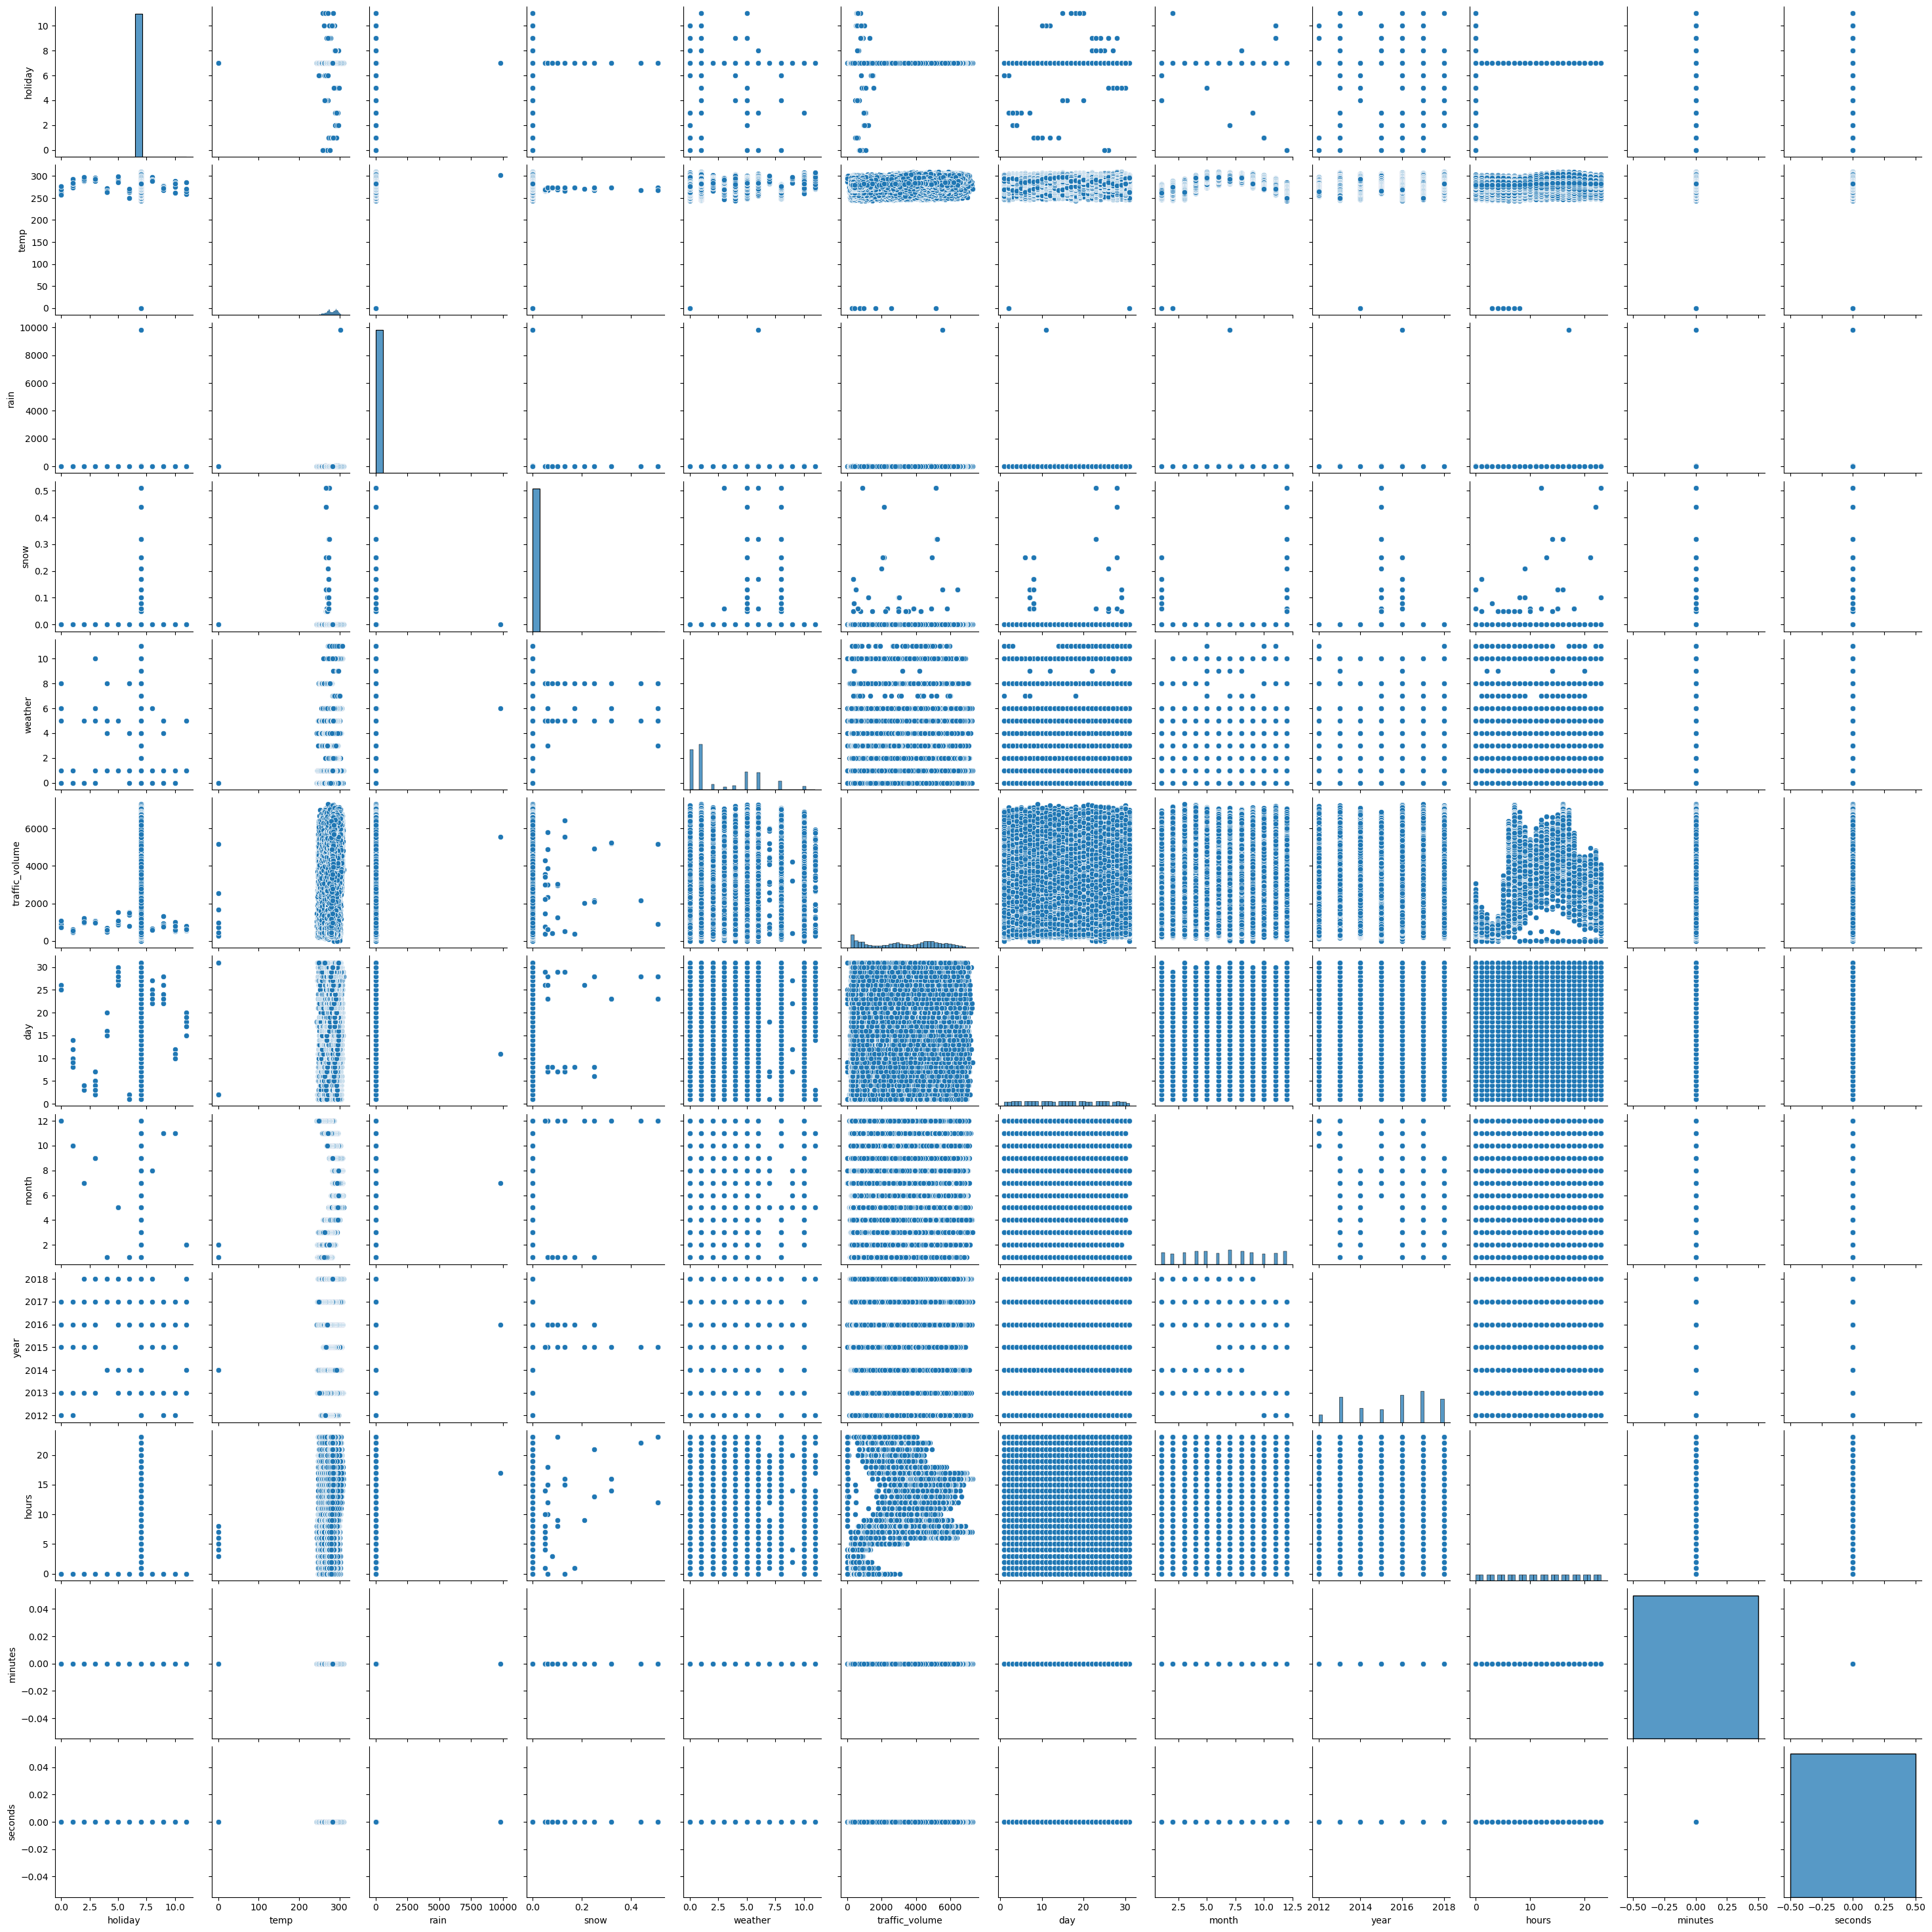

In [81]:
sns.pairplot(data)



<Axes: >

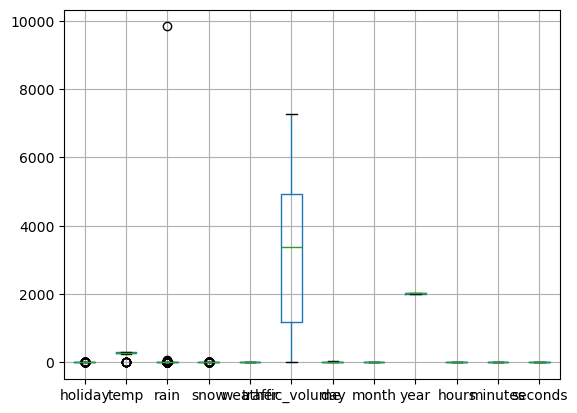

In [82]:
data.boxplot()

In [29]:
# Step 1: Drop missing values in 'date' and 'Time' columns just in case
data = data.dropna(subset=['date', 'Time'])

# Step 2: Convert to string explicitly
data['date'] = data['date'].astype(str)
data['Time'] = data['Time'].astype(str)

# Step 3: Check example formats (optional)
print("Sample date values:", data['date'].head())
print("Sample time values:", data['Time'].head())

# Step 4: Now split date safely
date_split = data['date'].str.split('-', expand=True)
if date_split.shape[1] == 3:
    data[['year', 'month', 'day']] = date_split
else:
    print("ERROR: Date format unexpected")

# Step 5: Split time safely
time_split = data['Time'].str.split(':', expand=True)
if time_split.shape[1] == 3:
    data[['hours', 'minutes', 'seconds']] = time_split
else:
    print("ERROR: Time format unexpected")

# Step 6: Drop original columns
data.drop(columns=['date', 'Time'], inplace=True)

# Step 7: Check result
print(data.head())

KeyError: ['date', 'Time']

In [30]:
# Dependent variable (Target)
y = data['traffic_volume']

# Independent variables (Features)
X = data.drop(columns=['traffic_volume'], axis=1)

In [31]:
print("X columns:", X.columns)
print("y sample values:", y.head())

X columns: Index(['holiday', 'temp', 'rain', 'snow', 'weather', 'day', 'month', 'year',
       'hours', 'minutes', 'seconds'],
      dtype='object')
y sample values: 0    5545
1    4516
2    4767
3    5026
4    4918
Name: traffic_volume, dtype: int64


In [32]:
from sklearn.preprocessing import scale
import pandas as pd

# Store original column names
names = X.columns

# Apply feature scaling
X_scaled = scale(X)

# Convert scaled data back to DataFrame
X = pd.DataFrame(X_scaled, columns=names)

# Check the result
X.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.026274,0.530485,-0.007463,-0.027235,-0.567564,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.026274,0.611467,-0.007463,-0.027235,-0.567564,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.026274,0.627964,-0.007463,-0.027235,-0.567564,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.026274,0.669205,-0.007463,-0.027235,-0.567564,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.026274,0.744939,-0.007463,-0.027235,-0.567564,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


In [33]:
from sklearn.model_selection import train_test_split

# Split the dataset: 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

# Initialize all models
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()

In [35]:
lin_reg.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
Rand.fit(x_train, y_train)
svr.fit(x_train, y_train)
XGB.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [36]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [37]:
from sklearn import metrics

print("Linear Regression R² score:", metrics.r2_score(y_train, p1))
print("Decision Tree R² score:", metrics.r2_score(y_train, p2))
print("Random Forest R² score:", metrics.r2_score(y_train, p3))
print("SVR R² score:", metrics.r2_score(y_train, p4))
print("XGBoost R² score:", metrics.r2_score(y_train, p5))

Linear Regression R² score: 0.13325574578257304
Decision Tree R² score: 1.0
Random Forest R² score: 0.9776305550853465
SVR R² score: 0.24337451011857503
XGBoost R² score: 0.8734012842178345


In [38]:
p1 = lin_reg.predict(x_test)
p2 = Dtree.predict(x_test)
p3 = Rand.predict(x_test)
p4 = svr.predict(x_test)
p5 = XGB.predict(x_test)

In [39]:
from sklearn import metrics

print("Linear Regression R² score (test):", metrics.r2_score(y_test, p1))
print("Decision Tree R² score (test):", metrics.r2_score(y_test, p2))
print("Random Forest R² score (test):", metrics.r2_score(y_test, p3))
print("SVR R² score (test):", metrics.r2_score(y_test, p4))
print("XGBoost R² score (test):", metrics.r2_score(y_test, p5))

Linear Regression R² score (test): 0.1358905714785934
Decision Tree R² score (test): 0.6926158225992145
Random Forest R² score (test): 0.8382089215995352
SVR R² score (test): 0.2471107123566989
XGBoost R² score (test): 0.8403846025466919


In [40]:
from sklearn import metrics
import numpy as np

# Calculate Mean Squared Error
MSE = metrics.mean_squared_error(y_test, p3)

# Calculate RMSE
RMSE = np.sqrt(MSE)

print("Random Forest RMSE:", RMSE)

Random Forest RMSE: 795.4411351591568


In [41]:
import pickle
import pandas as pd
le = pickle.load(open("encoder.pkl", "rb"))

In [42]:
# Text values
holiday = "Columbus Day"
weather = "Clear"

# Numeric values
temp = 280.0
rain = 0
snow = 0
day = 10
month = 2
year = 2012
hours = 8
minutes = 30
seconds = 0

In [43]:
holiday_mapping = {
    'None': 7,
    'Columbus Day': 1,
    'Veterans Day': 10,
    'Thanksgiving Day': 9,
    'Christmas Day': 6,
    'New Years Day': 2,
    'Washingtons Birthday': 11,
    'Memorial Day': 5,
    'Independence Day': 12,
    'State Fair': 3,
    'Labor Day': 9,
    'Martin Luther King Jr Day': 4
}

weather_mapping = {
    'Clear': 0,
    'Clouds': 1,
    'Rain': 3,
    'Drizzle': 4,
    'Mist': 5,
    'Haze': 4,
    'Fog': 7,
    'Thunderstorm': 10,
    'RainSnow': 8,
    'Squall': 9,
    'Smoke': 10
}

In [44]:
# Input from user or form
holiday = "Columbus Day"
weather = "Clear"

# Safely map string to int
holiday_encoded = holiday_mapping.get(holiday, 7)  # default to 'None' if not found
weather_encoded = weather_mapping.get(weather, 0)  # default to 'Clear' if not found

In [45]:
input_data = pd.DataFrame([[
    holiday_encoded, temp, rain, snow, weather_encoded,
    day, month, year, hours, minutes, seconds
]], columns=[
    'holiday', 'temp', 'rain', 'snow', 'weather',
    'day', 'month', 'year', 'hours', 'minutes', 'seconds'
])

In [46]:
import pickle

# Save the trained Random Forest model
pickle.dump(Rand, open("model.pkl", 'wb'))